In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd

In [2]:
# Defining constants
c = 3e+8             # speed of light
AU = 1.496e+11       # astronomical unit = 149.6 million km
G = 6.67408e-11      # Gravitational constant
pc = 3.086e+16       # parsec = 3.26 light years = 206,000 AU = 30.9 trillion km

# Defining radius and mass parameters of the system
M_sun = 1.989e+30    # in kg
M_earth = (5.972e+24) / M_sun # in solar masses
r_sun = 696340e+3    # 696,340 km converted to AU
r_earth = 6371e+3    # 6371 km

# Function to calculate location of L2, under reduced mass constraint
# R = distance between two masses M1, M2
# M1 = Mass of the larger object
# M2 = Mass of the smaller object
# https://en.wikipedia.org/wiki/Lagrange_point#L2
# Output: Langrange point distance in AU
def L2_point(R, M1, M2):
    return (R*(M2/(3*M1))**(1/3)) / AU

$$r_E = \theta_e D_L$$ where $$\theta_E = \sqrt{\frac{4GM}{c^2}\frac{1}{D}}$$

In [29]:
# Function to calculate Einstein angle of a lensing system
# M = mass of the lens
# D = Effective lensing distance
# Output: Einstein angle in radians
def Einstein_angle(M, D):
    return np.sqrt((4*G*M)/(c**2*D))

# Defining lensing system parameters (lengths)
DL = 1           # Distance between lens and observer in Gpc
DS = 1           # Distance between source and observer in Gpc
DLS = DL + DS    # Distance between lens and source in Gpc
D = DL*DS/DLS    # Effective lensing distance in Gpc
beta = np.linspace(-5,5)    # Angular position of source in radians

# Defining lensing system parameters (times)
#t_var =          # Minimum variability time scale
#T_90 =           # Observed burst duration

# Defining lensing system parameters
num_samples = 1000
M = np.logspace(-16, -11, num_samples)    # Mass of lens in solar masses
print(M[np.random.randint(0,1000)])
z_L = 2          # Redshift of lens (simplifying approximation)
z_S = 2          # Redshift of source (simplifying approximation)

# Derived parameters
theta_E = Einstein_angle(M, D)    # def Einstein_angle(M, D)
print(theta_E)
r_E = theta_E * DL                # Einstein radius in Gpc

1.9287915080207777e-16
[7.70228249e-22 7.74679289e-22 7.79156051e-22 7.83658684e-22
 7.88187336e-22 7.92742159e-22 7.97323304e-22 8.01930923e-22
 8.06565168e-22 8.11226194e-22 8.15914155e-22 8.20629208e-22
 8.25371508e-22 8.30141213e-22 8.34938482e-22 8.39763473e-22
 8.44616347e-22 8.49497266e-22 8.54406390e-22 8.59343884e-22
 8.64309911e-22 8.69304635e-22 8.74328224e-22 8.79380843e-22
 8.84462660e-22 8.89573845e-22 8.94714566e-22 8.99884995e-22
 9.05085303e-22 9.10315663e-22 9.15576249e-22 9.20867234e-22
 9.26188796e-22 9.31541110e-22 9.36924354e-22 9.42338707e-22
 9.47784349e-22 9.53261461e-22 9.58770224e-22 9.64310821e-22
 9.69883437e-22 9.75488256e-22 9.81125465e-22 9.86795250e-22
 9.92497800e-22 9.98233305e-22 1.00400195e-21 1.00980394e-21
 1.01563945e-21 1.02150869e-21 1.02741184e-21 1.03334911e-21
 1.03932069e-21 1.04532678e-21 1.05136757e-21 1.05744328e-21
 1.06355409e-21 1.06970022e-21 1.07588187e-21 1.08209924e-21
 1.08835253e-21 1.09464197e-21 1.10096775e-21 1.10733009e-21
 

In [6]:
Delta_t_d = 2 * 1e-5 * M    # time delay in seconds
r_Sch = 1e-5 * M * c        # Schwarzschild radius in metres
u = beta[np.random.randint(-5,5)] / theta_E          # Position of the source

In [7]:
# Conservative
epsilon = 0.1
nu = 1.2e+20    # 0.5 MeV
NGRB = 10**3
# Delta_r = np.array(((2*r_earth) / AU, L2_point(R, M_sun, M_earth), 2))     # distances in AU
                                                                       # def L2_point(R, M1, M2)
                                                                       # Delta_r[0] = 2*r_earth, Delta_r[1] = L2_point, Delta_r[2] = 2*AU

In [6]:
# Optimistic
epsilon = 0.01
nu = 1.2e+21    # 5 MeV
NGRB = 10**4
# Delta_r = np.array(((2*r_earth) / AU, L2_point(R, M_sun, M_earth), 2))    # distances in AU
                                                                       # def L2_point(R, M1, M2)
                                                                       # Delta_r[0] = 2*r_earth, Delta_r[1] = L2_point, Delta_r[2] = 2*AU

In [13]:
# Function to calculate the upper and lower bound for lens' mass in units of solar masses
def Lensing_parallax_conditions(Delta_r, M, r_E, D):
    prefactor_1 = (AU**2) / (M_sun * (1e9 * pc)) * ((c**2) / (4 * G))
    M_upper = prefactor_1 * (Delta_r)**2 * (1/D)
    # WARNING: NOT INCLUDED RADIOMETRIC RESOLUTION CONDITION
    prefactor_2 = (r_sun**2) / ((1e9 * pc) * M_sun) * ((c**2) / (4 * G))
    prefactor_3 = (0.1 * (c**3)) / (2 * G) * 1 / (nu * (1 + z_L)) * 1 / (M_sun)
    M_lower = np.max((prefactor_2 * epsilon * (1/D) * (r_S)**2), (prefactor_3))
    if ((M > M_lower) and (M < M_upper)):
        print(M," is in the given mass range", M_lower, " to ", M_upper)
    else:
        print(M," is not in the given mass range", M_lower, " to ", M_upper)

In [14]:
NGRB_small = 0.1 * NGRB    # "smallest GRBs with r_S < r_sun are the ones that allow to probe lightest unconstrained PBH mass range"
NGRB_tiny = 0.03 * NGRB    # r_S < 0.1 r_sun

 - From 1. $$\Delta r \gtrsim r_E \Leftrightarrow M_{max} \lesssim \left(\frac{\Delta r}{AU}\right)^2 \left(\frac{Gpc}{D}\right)10^{-7}M_\odot$$
 - From 2. $$M_{min} \gtrsim \epsilon \left(\frac{r_S}{r_\odot}\right)^2 \left(\frac{Gpc}{D}\right) 10^{-12}M_\odot$$
 - From 3. for GRBs with $f = 10^{19} - 10^{21}$ and negligible $z_L$ $$M_{min} \gtrsim (10^{-15} - 10^{-17})M_\odot$$

In [8]:
#r_S = c * T_90    # Physical transverse emission size
r_S = 0.1778 * r_earth
#Gamma = c * T_90   # Lorentz boost

In [9]:
# Function to calculate magnification and brightness flux of each image
# u = beta/theta_E 
    # where beta is the angular position of the source
    # and theta_E is the Einstein angle of the given lensing system
# Output: individual magnifications of each image [mag_1, mag_2]
def image_magnification(u):
    mag_dist = (u**2 + 2)/(2*u*np.sqrt(u**2 + 4))
    return np.abs(0.5 + mag_dist), np.abs(0.5 - mag_dist)

# Obtaining parameter values
# Output: total magnification. Calls image_magnification(u) as an intermediary
def total_magnification(u):
    [mu_plus,mu_minus] = image_magnification(u)
    A = mu_plus + mu_minus    # Observed magnification of unresolved images
    return A

In [10]:
# Function to calculate resolution of measured magnification
delta_A = lambda A1, A2: np.abs(A1 - A2) / (A1 + A2)

#A1 = total_magnification(u1)
#A2 = total_magnification(u2)
#delta_A(A1,A2)

### Appendix B: Finite source-size effect

In [18]:
# Function to calculate A_in
# Output: A_in
def A_in(u, delta):
    return (np.sqrt(1+ 4/(delta**2)) - 8 / (delta**3 * (delta**2 + 4)**1.5) * u**2/2 - 144 * (delta**4 + 2*delta**2 + 2) / (delta**5 * (delta**2 + 4)**3.5) * delta**4/24)
    
# Function to calculate A_out
# Output: A_out
def A_out(u, delta):
    return ((2 + u**2) / (u*np.sqrt(u**2 + 4)) + (8*(u**2 + 1)) / (u**3 * (u**2 + 4))**2.5 * delta**2/2 + 48*(3*u**6 + 6*u**4 + 14*u**2 + 12) / (u**5 * (u**2 + 4)**4.5) * delta**4/24)    

# Function to calculate the magnification of a finite sized circular source with constant surface brightness by a point-lens in the geometrical optics limit
# r_S = source size
# D = Effective lensing distance
# theta_E = Einstein angle
# u = Position of the source
# Output: Magnification
def finite_source_size_effect(r_S, D, theta_E, u):
    delta = (r_S/D)/theta_E
    print(delta)
    if u<=0.9*delta:
        return A_in(u,delta)
    elif u>=1.1*delta:
        return A_out(u,delta)
    else:
        return (A_in(0.9*delta, delta)*(u - 0.9*delta)/0.2 + A_out(1.1*delta, delta)*(1.1*delta - u)/0.2)

### Appendix C: Computing optical depth and constraints

In [31]:
H_0 = 70e3          # Cosmological constant in m/s/Mpc
rho_crit_0 = (3 * ((70e3)**2)) / (8 * np.pi * G) * (pc*1e6) / M_sun # critical density in solar masses per Mpc^3
Omega_DM = 0.26
f = np.logspace(-4,0,num_samples)
n = lambda f: rho_crit_0 * Omega_DM * f / M 

import scipy.integrate as integrate
# Dividing a region in the lens plans into 6400 rectangular sectors
arr_lens_plane = np.array((80,80))
# Simulating magnification assuming A2 = 1 +/- 0.01
y1 = 0
A1 = 0
A2 = 1
# Loop to simulate magnification
while (1):
    y1 += np.random.randint(0,6)/1000
    A1 = finite_source_size_effect(r_S, D, theta_E, y1)
    A2 += np.random.randint(-5,6)/1000
    if delta_A(A1,A2) > (epsilon/2):
        break
sigma = lambda chi_L: 1
chi_S = DLS
V_L = integrate.quad(sigma , 0, chi_S)

tau = lambda f: n(f) * V_L
P1 = lambda f: tau * np.exp(-tau)

[2.94137173e+27 2.92447163e+27 2.90766862e+27 2.89096216e+27
 2.87435169e+27 2.85783665e+27 2.84141651e+27 2.82509071e+27
 2.80885871e+27 2.79271998e+27 2.77667397e+27 2.76072016e+27
 2.74485802e+27 2.72908701e+27 2.71340662e+27 2.69781632e+27
 2.68231559e+27 2.66690393e+27 2.65158082e+27 2.63634575e+27
 2.62119822e+27 2.60613772e+27 2.59116375e+27 2.57627582e+27
 2.56147343e+27 2.54675608e+27 2.53212330e+27 2.51757459e+27
 2.50310948e+27 2.48872747e+27 2.47442810e+27 2.46021089e+27
 2.44607537e+27 2.43202106e+27 2.41804751e+27 2.40415424e+27
 2.39034080e+27 2.37660673e+27 2.36295156e+27 2.34937486e+27
 2.33587616e+27 2.32245502e+27 2.30911100e+27 2.29584364e+27
 2.28265251e+27 2.26953718e+27 2.25649720e+27 2.24353215e+27
 2.23064159e+27 2.21782509e+27 2.20508223e+27 2.19241259e+27
 2.17981574e+27 2.16729127e+27 2.15483876e+27 2.14245780e+27
 2.13014798e+27 2.11790888e+27 2.10574011e+27 2.09364125e+27
 2.08161191e+27 2.06965169e+27 2.05776018e+27 2.04593700e+27
 2.03418175e+27 2.022494

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Calculating the bound for f
P_null = lambda: (1 - P1(f))**(NGRB/1000)
if P_null(f) < 0.05:
    f_max = f

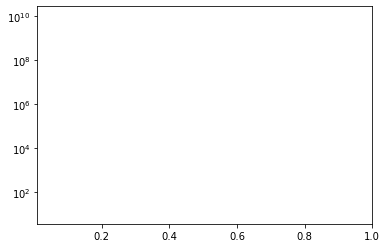

In [55]:
# Plot f vs Mass of lens
plt.plot(M, f)

plt.xlabel('$M_{PBH} (M_\odot)$')
plt.xscale('log')
plt.xlim([1e-16,1e-11])
plt.ylabel('$f=\frac{\Omega_{PBH}}{\Omega_{DM}}$')
plt.yscale('log')
plt.ylim([1e-4,1])

plt.show()

In [ ]:
# Plot Optical Depth vs Mass of lens
plt.plot(M, tau)

plt.xlabel('$M_{PBH} (M_\odot)$')
plt.xscale('log')
plt.xlim([1e-16,1e-11])
plt.ylabel('Optical depth $\tau$')
plt.yscale('log')
plt.ylim([1e-8,1e4])

plt.show()

In [24]:
import scipy.integrate as integrate
sigma = lambda chi_L: chi_L**2
integrate.quad(sigma, 0, 3)

(9.000000000000002, 9.992007221626411e-14)